In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib
plt.style.use('default')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [2]:
save_folder = 'train_0.5_valid_0.7_test'
train_data = pd.read_csv('../data/' + save_folder + '/train_data_170_Normalization.csv')
X_train = train_data.drop(['Species'], axis = 1).values
y_train = train_data[['Species']].copy().values
test_data = pd.read_csv('../data/' + save_folder + '/train_data_170_test.csv')
X_test = test_data.drop(['Species'], axis = 1).values
y_test = test_data[['Species']].copy().values

y_train = np.squeeze(y_train)

y_test = np.squeeze(y_test)

In [3]:
def runKMeans(init, max_iter, algo, n_init, X_train, X_test, y_test):
    kmeans = KMeans(init=init, n_clusters=3, max_iter = max_iter, algorithm = algo, n_init=n_init, tol = 0)
    kmeans.fit(X_train)

    # training predictions
    train_labels= kmeans.predict(X_train)

    #testing predictions
    test_labels = kmeans.predict(X_test)

    unique, counts = np.unique(train_labels, return_counts=True)
    dict_cluster_population = dict(zip(unique, counts))

    temp_labels = train_labels.copy() + 3
    test_temp = test_labels + 3
    key_0_true = max(dict_cluster_population, key=dict_cluster_population.get) + 3
    key_1_true = min(dict_cluster_population, key=dict_cluster_population.get) + 3
    key_2_true = 3 - key_0_true - key_1_true + 9

    for i, v in enumerate(temp_labels):
        if v == key_0_true:
            temp_labels[i] = 0
        elif v == key_1_true:
            temp_labels[i] = 1
        else:
            temp_labels[i] = 2

    for i, v in enumerate(test_temp):
        if v == key_0_true:
            test_temp[i] = 0
        elif v == key_1_true:
            test_temp[i] = 1
        else:
            test_temp[i] = 2

    a = accuracy_score(np.floor(y_train + 1.1).astype(int), temp_labels)*100
    b = accuracy_score(np.floor(y_test + 1.1).astype(int), test_temp)*100
    return a, b, train_labels

In [4]:
for i in range (1, 11):
    list_a3 = list()
    list_b3 = list()
    print(i, end = ': ')
    a, b, c = runKMeans('k-means++', i, 'lloyd', 3, X_train, X_test, y_test)
    list_a3.append(a)
    list_b3.append(b)
    print(a, b)

1: 96.47058823529412 95.1923076923077
2: 92.94117647058823 94.23076923076923
3: 97.6470588235294 97.11538461538461
4: 99.41176470588235 98.07692307692307
5: 98.82352941176471 97.11538461538461
6: 98.82352941176471 98.07692307692307
7: 98.23529411764706 97.11538461538461
8: 98.82352941176471 98.07692307692307
9: 98.23529411764706 97.11538461538461
10: 98.23529411764706 97.11538461538461


In [5]:
c

array([2, 2, 0, 1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2,
       1, 0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0,
       0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 1, 0,
       0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 1,
       1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 1, 2,
       2, 1, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2,
       1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0], dtype=int32)

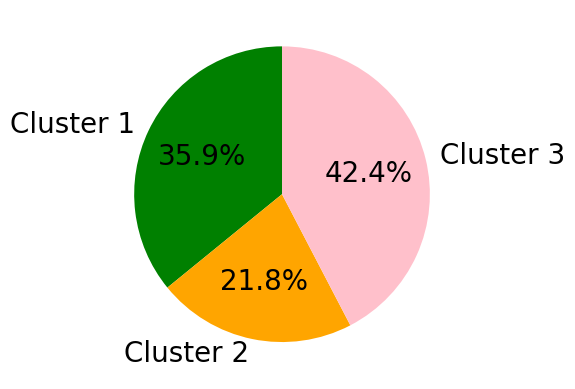

In [6]:
len_c = len(c)
cluster_A = np.count_nonzero(c == 0) / len_c
cluster_B = np.count_nonzero(c == 1) / len_c
cluster_C = 1 - cluster_A - cluster_B
plt.pie([cluster_A, cluster_B, cluster_C], labels = ['Cluster 1', 'Cluster 2', 'Cluster 3'], 
        autopct='%1.1f%%', startangle=90, colors = ['green', 'orange', 'pink'])

plt.savefig('../pics/K_Means/full_pie.svg', bbox_inches='tight')
plt.savefig('../pics/K_Means/full_pie.pdf', bbox_inches='tight')

In [7]:
list_a1 = list()
list_b1 = list()
for i in range (1, 11):
    print(i, end = ': ')
    a, b, c = runKMeans('k-means++', i, 'lloyd', 5, X_train, X_test, y_test)
    list_a1.append(a)
    list_b1.append(b)
    print(a, b)

1: 98.23529411764706 96.15384615384616
2: 97.05882352941177 97.11538461538461
3: 98.82352941176471 98.07692307692307
4: 98.82352941176471 97.11538461538461
5: 98.82352941176471 98.07692307692307
6: 97.6470588235294 97.11538461538461
7: 98.82352941176471 97.11538461538461
8: 98.82352941176471 98.07692307692307
9: 98.23529411764706 97.11538461538461
10: 98.23529411764706 97.11538461538461


In [8]:
list_a2 = list()
list_b2 = list()
for i in range (1, 11):
    print(i, end = ': ')
    a, b, d = runKMeans('random', i, 'lloyd', 5, X_train, X_test, y_test)
    list_a2.append(a)
    list_b2.append(b)
    print(a, b)

1: 8.823529411764707 11.538461538461538
2: 96.47058823529412 95.1923076923077
3: 98.23529411764706 97.11538461538461
4: 8.823529411764707 11.538461538461538
5: 98.82352941176471 97.11538461538461
6: 98.23529411764706 97.11538461538461
7: 97.6470588235294 97.11538461538461
8: 98.82352941176471 98.07692307692307
9: 97.6470588235294 97.11538461538461
10: 97.6470588235294 97.11538461538461


In [9]:
print(list_a1)
print(list_b1)
print(list_a2)
print(list_b2)

[98.23529411764706, 97.05882352941177, 98.82352941176471, 98.82352941176471, 98.82352941176471, 97.6470588235294, 98.82352941176471, 98.82352941176471, 98.23529411764706, 98.23529411764706]
[96.15384615384616, 97.11538461538461, 98.07692307692307, 97.11538461538461, 98.07692307692307, 97.11538461538461, 97.11538461538461, 98.07692307692307, 97.11538461538461, 97.11538461538461]
[8.823529411764707, 96.47058823529412, 98.23529411764706, 8.823529411764707, 98.82352941176471, 98.23529411764706, 97.6470588235294, 98.82352941176471, 97.6470588235294, 97.6470588235294]
[11.538461538461538, 95.1923076923077, 97.11538461538461, 11.538461538461538, 97.11538461538461, 97.11538461538461, 97.11538461538461, 98.07692307692307, 97.11538461538461, 97.11538461538461]


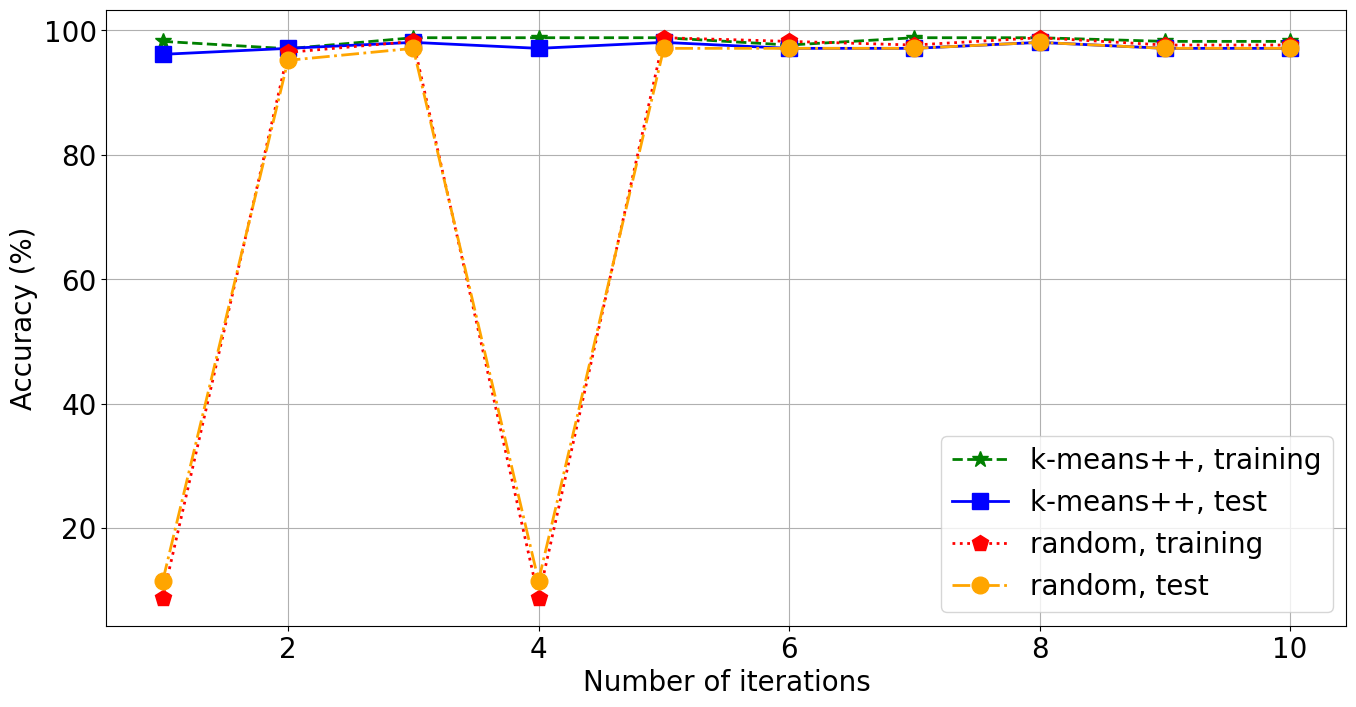

In [10]:
plt.rcParams['figure.figsize'] = [16, 8]
maxiters = list(range(1, 11))
plt.plot(maxiters, list_a1, color='green', marker='*', linestyle='dashed',
     linewidth=2, markersize=12, label = 'k-means++, training')
plt.plot(maxiters, list_b1, color='blue', marker='s', linestyle='-',
     linewidth=2, markersize=12, label = 'k-means++, test')
plt.plot(maxiters, list_a2, color='red', marker='p', linestyle='dotted',
     linewidth=2, markersize=12, label = 'random, training')
plt.plot(maxiters, list_b2, color='orange', marker='o', linestyle='-.',
     linewidth=2, markersize=12, label = 'random, test')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy (%)')
plt.grid()
plt.savefig('../pics/K_Means/full_iterations.svg', bbox_inches='tight')
plt.savefig('../pics/K_Means/full_iterations.pdf', bbox_inches='tight')

In [11]:
def runKMeans(init, max_iter, algo, n_init, X_train, X_test, y_test):
    kmeans = KMeans(init=init, n_clusters=3, max_iter = max_iter, algorithm = "lloyd", n_init=n_init, tol = 0)
    kmeans.fit(X_train)

    # training predictions
    train_labels= kmeans.predict(X_train)

    #testing predictions
    test_labels = kmeans.predict(X_test)

    unique, counts = np.unique(train_labels, return_counts=True)
    dict_cluster_population = dict(zip(unique, counts))

    temp_labels = train_labels.copy() + 3
    test_temp = test_labels + 3
    key_0_true = max(dict_cluster_population, key=dict_cluster_population.get) + 3
    key_1_true = min(dict_cluster_population, key=dict_cluster_population.get) + 3
    key_2_true = 3 - key_0_true - key_1_true + 9

    for i, v in enumerate(temp_labels):
        if v == key_0_true:
            temp_labels[i] = 0
        elif v == key_1_true:
            temp_labels[i] = 1
        else:
            temp_labels[i] = 2

    for i, v in enumerate(test_temp):
        if v == key_0_true:
            test_temp[i] = 0
        elif v == key_1_true:
            test_temp[i] = 1
        else:
            test_temp[i] = 2

    a = accuracy_score(np.floor(y_train + 1.1).astype(int), temp_labels)*100
    b = accuracy_score(np.floor(y_test + 1.1).astype(int), test_temp)*100
    return a, b, temp_labels, test_temp

In [12]:
a, b, c, d = runKMeans('k-means++', 10, 'lloyd', 5, X_train, X_test, y_test)

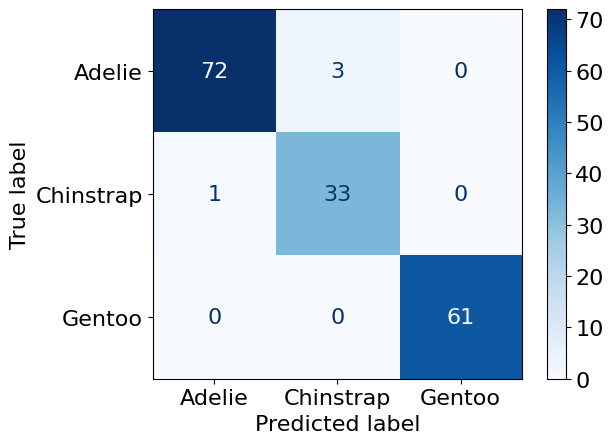

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('default')

labels = ["Adelie", "Chinstrap", "Gentoo"]
font = {
    'size'   : 16}
plt.rc('font', **font)

cm = confusion_matrix(np.floor(y_train + 1.1).astype(int), c)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


disp.plot(cmap=plt.cm.Blues)
plt.savefig('../pics/K_Means/TrainConfusionMatrixDisplay.svg', bbox_inches='tight')
plt.savefig('../pics/K_Means/TrainConfusionMatrixDisplay.pdf', bbox_inches='tight')
plt.show()

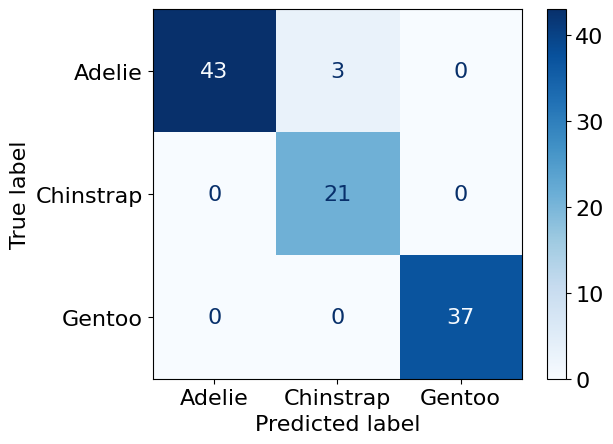

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('default')

labels = ["Adelie", "Chinstrap", "Gentoo"]
font = {
    'size'   : 16}
plt.rc('font', **font)

labels = ["Adelie", "Chinstrap", "Gentoo"]

cm = confusion_matrix(np.floor(y_test + 1.1).astype(int), d)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.savefig('../pics/K_Means/TestConfusionMatrixDisplay.svg', bbox_inches='tight')
plt.savefig('../pics/K_Means/TestConfusionMatrixDisplay.pdf', bbox_inches='tight')
plt.show()

In [15]:
precision = precision_score(np.floor(y_train + 1.1).astype(int), c, average='macro')
recall =  recall_score(np.floor(y_train + 1.1).astype(int), c, average='macro')
f1 = f1_score(np.floor(y_train + 1.1).astype(int), c, average='macro')
precision, recall, f1

(0.96765601217656, 0.9768627450980393, 0.971943371943372)

In [16]:
precision = precision_score(np.floor(y_test + 1.1).astype(int), d, average='macro')
recall =  recall_score(np.floor(y_test + 1.1).astype(int), d, average='macro')
f1 = f1_score(np.floor(y_test + 1.1).astype(int), d, average='macro')
precision, recall, f1

(0.9583333333333334, 0.9782608695652174, 0.9665418227215979)

## Lưu K-Means Model

Lưu K-Means clustering model

In [17]:
import joblib
import os
from datetime import datetime

# Tạo thư mục
os.makedirs('../results/model/k_means', exist_ok=True)

print("="*70)
print("🔥 LƯU K-MEANS MODEL")
print("="*70)

# Train best K-Means model với data hiện tại
best_kmeans = KMeans(
    init='k-means++',
    n_clusters=3,
    max_iter=100,
    algorithm='lloyd',
    n_init=10,
    tol=0
)
best_kmeans.fit(X_train)

# Đánh giá
inertia = best_kmeans.inertia_
print(f"\n  N clusters: 3")
print(f"  Inertia: {inertia:.2f}")
print(f"  Training samples: {len(X_train)}")

# Lưu model
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
model_path = f'../results/model/k_means/kmeans_{timestamp}.pkl'
joblib.dump(best_kmeans, model_path)
joblib.dump(best_kmeans, '../results/model/k_means/kmeans_best.pkl')

print(f"\n✓ K-Means Model đã được lưu!")
print(f"  File 1: kmeans_{timestamp}.pkl")
print(f"  File 2: kmeans_best.pkl (tên cố định)")
print(f"{'='*70}")

🔥 LƯU K-MEANS MODEL

  N clusters: 3
  Inertia: 497.08
  Training samples: 170

✓ K-Means Model đã được lưu!
  File 1: kmeans_20260109_124425.pkl
  File 2: kmeans_best.pkl (tên cố định)
